<a href="https://colab.research.google.com/github/HoPhuocMinhQuan20104052/HoPhuocMinhQuan/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Flower2/Train',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 2201 images belonging to 3 classes.


In [ ]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Flower2/Valid',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 300 images belonging to 3 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 19, 19, 128)     

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=10,batch_size=128,verbose=1, validation_data=test_set)

Epoch 1/10
69/69 [==============================] - 767s 11s/step - loss: 0.9443 - accuracy: 0.5584 - val_loss: 0.7622 - val_accuracy: 0.6533
Epoch 2/10
69/69 [==============================] - 22s 322ms/step - loss: 0.7107 - accuracy: 0.6715 - val_loss: 0.7319 - val_accuracy: 0.6800
Epoch 3/10
69/69 [==============================] - 21s 309ms/step - loss: 0.6466 - accuracy: 0.7047 - val_loss: 0.7278 - val_accuracy: 0.6567
Epoch 4/10
69/69 [==============================] - 22s 319ms/step - loss: 0.5873 - accuracy: 0.7447 - val_loss: 0.7544 - val_accuracy: 0.6167
Epoch 5/10
69/69 [==============================] - 22s 318ms/step - loss: 0.5327 - accuracy: 0.7746 - val_loss: 0.6752 - val_accuracy: 0.6300
Epoch 6/10
69/69 [==============================] - 22s 322ms/step - loss: 0.5022 - accuracy: 0.7874 - val_loss: 0.8581 - val_accuracy: 0.5900
Epoch 7/10
69/69 [==============================] - 21s 303ms/step - loss: 0.4693 - accuracy: 0.8028 - val_loss: 0.7108 - val_accuracy: 0.6533


In [ ]:
model.save('Nhandienhoa.h5')


In [ ]:
model_flower = load_model('Nhandienhoa.h5')


1/1 [==============================] - 0s 17ms/step
Đây là : Rose


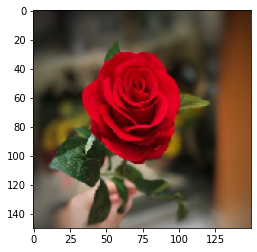

In [ ]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/Hoa-hong-Buoc9-2.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_flower.predict(img)
class_name=['Rose','Sun Flower','Tulip']
m= int(np.argmax(result,axis=1))
print("Đây là :", class_name[m])